In [7]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import pandas as pd

emb_dir = '/Users/royyanovski/Desktop/DS Project - Product matching/train_img_emb.csv'
img_emb = np.genfromtxt(emb_dir, delimiter=',')
X_emb_dir = '/Users/royyanovski/Desktop/DS Project - Product matching/X_emb_data.csv'
X = pd.read_csv(X_emb_dir)
posting_ids = X['posting_id'].values
thresh = 1
k_neighbors = 51
X.set_index('posting_id', inplace=True)
nbrs = NearestNeighbors(n_neighbors=k_neighbors, algorithm='ball_tree').fit(img_emb)
distances, indices = nbrs.kneighbors(img_emb)

In [22]:
import cv2
import requests
import matplotlib.pyplot as plt

def one_request(to_match_id, X):
    im_n = X.loc[X.index == to_match_id, 'image'].values[0]
    im_p = '/Users/royyanovski/Desktop/DS Project - Product matching/train_images/' + im_n
    im = cv2.imread(im_p)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    print('Product image to match:')
    print()
    print('Title: ' + X.loc[X.index == to_match_id, 'title'].values[0])
    print()
    plt.imshow(im)
    plt.show()
    print()
    print()
    print('Matching product(s) image(s):')    
    response = requests.get('http://0.0.0.0:3333/prediction', 
                          params={'posting_id': to_match_id})
    matches = response.json()
    for match in matches:
        im_name = X.loc[X.index == match, 'image'].values[0]
        im_path = '/Users/royyanovski/Desktop/DS Project - Product matching/train_images/' + im_name
        img = cv2.imread(im_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        print()
        print('Title: ' + X.loc[X.index == match, 'title'].values[0])
        print()
        plt.imshow(img)
        plt.show()

Product image to match:

Title: PEMISAH KUNING TELUR - SENDOK SARINGAN



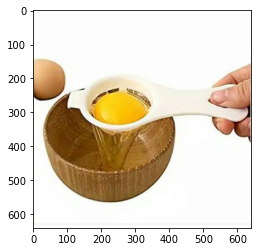



Matching product(s) image(s):

Title: [42gr] B28 Alat Pemisah Kuning dan Putih Telur (Egg Separator)



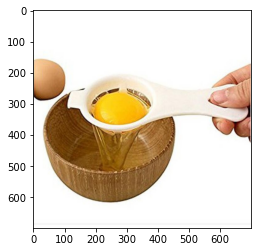


Title: Alat Pemisah Putih dan Kuning Telur / egg white separator



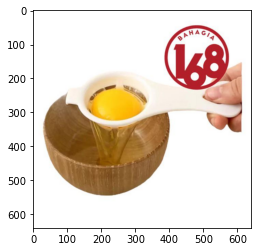


Title: CHIKOCHIKA Alat Pemisah Kuning dan Putih Telur (Egg Separator)



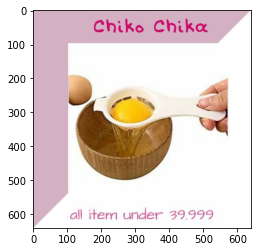

In [46]:
one_request('train_1068676888', X)

Product image to match:

Title: [Mustika Puteri] O My Tint 2in1 Lip Tint (Produk Wirda Mansur)



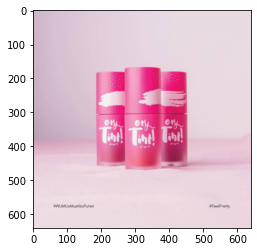



Matching product(s) image(s):

Title: Mustika Puteri O My Tint 2 in 1 Lip Tint



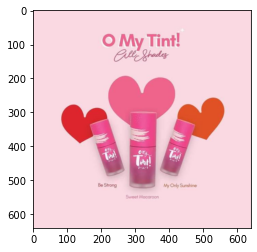

In [47]:
one_request('train_4278082081', X)